In [39]:
import pandas as pd
import torch
import PIL.Image
from torchvision import transforms
import  numpy as np
import  torch
import torchvision
import torch.nn.functional as F
from torch import  nn
from torch import optim


# 数据集预处理

In [40]:
data_file = "data/lungdatasets.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)

In [41]:
# csv使用分号分割，seq指定分隔符为；
data = pd.read_csv(data_file,sep=';')

# 住院时长周数为值
outputs = data.iloc[:, 25]
# double_list = outputs
for id,value in enumerate(outputs):
    if value <= 2:
        value = 1
    elif value<= 4:
        value = 2
    elif value<= 6:
        value = 3
    elif value<= 8:
        value = 4
    else:
        value = 5
    outputs[id] = value
# outputs = double_list


# 定义特征
all_features = data.iloc[:, 1:25]
strlist = ['性别(1=男，2=女）','入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床转归（0=临床治愈，1=病毒转阴）','首诊时有无发热（0=否，1=是）','以前曾是否患过肺炎（0=否，1=是）','病灶位置是否右上（1=是，0=否）','病灶位置是否右中（1=是，0=否）','病灶位置是否右下（1=是，0=否）','病灶位置是否左上（1=是，0=否）','病灶位置是否左下（1=是，0=否）']
all_features[strlist] = all_features[strlist].astype(np.str)
print(all_features.dtypes)


年龄(岁)                                      float64
性别(1=男，2=女）                                 object
入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床转归（0=临床治愈，1=病毒转阴）                      object
首次查体体温（℃）                                  float64
首诊时有无发热（0=否，1=是）                            object
身高（cm）                                     float64
体重(kg)                                     float64
既往史评分                                        int64
以前曾是否患过肺炎（0=否，1=是）                          object
ICU时长（天）                                     int64
呼吸机时长（小时）                                  float64
病灶位置是否右上（1=是，0=否）                           object
病灶位置是否右中（1=是，0=否）                           object
病灶位置是否右下（1=是，0=否）                           object
病灶位置是否左上（1=是，0=否）                           object
病灶位置是否左下（1=是，0=否）                           object
首次检查病灶体积总和（cm?）                            float64
首次检查全部病灶占全肺体积占比(%)             


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
# for i in all_features['身高（cm）']:
#     if(i==0):
#         i = None
#         print(i)

#修改数值特征中的所有0值为NAN
zero_2_nan_Str = ['身高（cm）','体重(kg)','首次检查病灶体积总和（cm?）','首次检查全部病灶占全肺体积占比(%)','首次检查全部病灶的平均密度（HU）','末次检查病灶体积总和（cm?）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）']
all_features[zero_2_nan_Str] = all_features[zero_2_nan_Str].replace(0,np.nan)
all_features

,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,ICU时长（天）,呼吸机时长（小时）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,末次检查病灶体积总和（cm?）,末次检查全部病灶占全肺体积占比(%),末次检查全部病灶的平均密度（HU）
0,25.0,1,1.0,2.0,1.0,38.2,1.0,176.0,72.0,2,0.0,0,0.00,0,0,1,1,1.0,172.04,3.68,-335.00,NaN,NaN,NaN
1,29.0,1,2.0,2.0,1.0,36.5,0.0,165.0,70.0,0,0.0,0,0.00,0,0,1,0,0.0,26.49,0.53,-621.00,NaN,NaN,NaN
2,30.0,1,2.0,2.0,1.0,36.0,0.0,175.0,67.5,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,2,0.0,0.0,1.0,36.5,1.0,156.0,72.5,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,2,1.0,2.0,1.0,39.0,1.0,160.0,70.0,0,0.0,0,0.00,0,0,1,1,1.0,44.36,1.20,-557.00,NaN,NaN,NaN
5,22.0,1,1.0,1.0,1.0,36.0,1.0,162.0,47.0,1,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,4.82,0.09,-590.00
6,61.0,2,3.0,3.0,1.0,37.8,1.0,165.0,66.5,1,0.0,9,201.38,1,1,1,1,1.0,479.46,25.19,-346.00,NaN,NaN,NaN
7,62.0,1,2.0,2.0,1.0,37.6,1.0,176.0,62.0,1,0.0,11,519.74,1,1,1,1,1.0,808.39,22.30,-458.00,2.60,0.07,-700.00
8,62.0,2,2.0,2.0,1.0,37.8,1.0,160.0,73.0,1,0.0,0,0.00,1,1,1,1,1.0,244.55,5.61,-656.00,6.97,0.16,-766.00
9,48.0,2,1.0,1.0,1.0,37.5,1.0,NaN,NaN,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# del_list = ['首次检查病灶体积总和（cm?）','首次检查全部病灶占全肺体积占比(%)','首次检查全部病灶的平均密度（HU）','末次检查病灶体积总和（cm?）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）','首次查体体温（℃）','ICU时长（天）','呼吸机时长（小时）']

del_list = ['首次查体体温（℃）','ICU时长（天）','呼吸机时长（小时）']

all_features = all_features.drop(columns=del_list)
all_features

,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,末次检查病灶体积总和（cm?）,末次检查全部病灶占全肺体积占比(%),末次检查全部病灶的平均密度（HU）
0,25.0,1,1.0,2.0,1.0,1.0,176.0,72.0,2,0.0,0,0,1,1,1.0,172.04,3.68,-335.00,NaN,NaN,NaN
1,29.0,1,2.0,2.0,1.0,0.0,165.0,70.0,0,0.0,0,0,1,0,0.0,26.49,0.53,-621.00,NaN,NaN,NaN
2,30.0,1,2.0,2.0,1.0,0.0,175.0,67.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,2,0.0,0.0,1.0,1.0,156.0,72.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,2,1.0,2.0,1.0,1.0,160.0,70.0,0,0.0,0,0,1,1,1.0,44.36,1.20,-557.00,NaN,NaN,NaN
5,22.0,1,1.0,1.0,1.0,1.0,162.0,47.0,1,0.0,0,0,0,0,0.0,NaN,NaN,NaN,4.82,0.09,-590.00
6,61.0,2,3.0,3.0,1.0,1.0,165.0,66.5,1,0.0,1,1,1,1,1.0,479.46,25.19,-346.00,NaN,NaN,NaN
7,62.0,1,2.0,2.0,1.0,1.0,176.0,62.0,1,0.0,1,1,1,1,1.0,808.39,22.30,-458.00,2.60,0.07,-700.00
8,62.0,2,2.0,2.0,1.0,1.0,160.0,73.0,1,0.0,1,1,1,1,1.0,244.55,5.61,-656.00,6.97,0.16,-766.00
9,48.0,2,1.0,1.0,1.0,1.0,NaN,NaN,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

# print(numeric_features[1])
# print(all_features[numeric_features])

all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=False)
all_features
data = pd.concat([all_features,outputs],axis=1)
data


,年龄(岁),身高（cm）,体重(kg),既往史评分,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,末次检查病灶体积总和（cm?）,末次检查全部病灶占全肺体积占比(%),末次检查全部病灶的平均密度（HU）,性别(1=男，2=女）_1,性别(1=男，2=女）_2,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,出院时临床转归（0=临床治愈，1=病毒转阴）_0.0,出院时临床转归（0=临床治愈，1=病毒转阴）_1.0,出院时临床转归（0=临床治愈，1=病毒转阴）_nan,首诊时有无发热（0=否，1=是）_0.0,首诊时有无发热（0=否，1=是）_1.0,首诊时有无发热（0=否，1=是）_nan,以前曾是否患过肺炎（0=否，1=是）_0.0,以前曾是否患过肺炎（0=否，1=是）_1.0,以前曾是否患过肺炎（0=否，1=是）_nan,病灶位置是否右上（1=是，0=否）_0,病灶位置是否右上（1=是，0=否）_1,病灶位置是否右中（1=是，0=否）_0,病灶位置是否右中（1=是，0=否）_1,病灶位置是否右下（1=是，0=否）_0,病灶位置是否右下（1=是，0=否）_1,病灶位置是否左上（1=是，0=否）_0,病灶位置是否左上（1=是，0=否）_1,病灶位置是否左下（1=是，0=否）_0.0,病灶位置是否左下（1=是，0=否）_1.0,病灶位置是否左下（1=是，0=否）_nan,住院时长(天)
0,-0.942885,0.805554,0.234401,2.316212,-0.093414,-0.023783,1.443427,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,2
1,-0.690293,-0.066029,0.110304,-0.423394,-0.528198,-0.110194,-0.801605,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,2
2,-0.627145,0.726319,-0.044819,-0.423394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,2
3,0.067482,-0.779142,0.265426,-0.423394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,2
4,-0.690293,-0.462203,0.110304,-0.423394,-0.474817,-0.091815,-0.299220,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,3
5,-1.132328,-0.303733,-1.316822,0.946409,0.000000,0.000000,0.000000,-0.423384,-0.299832,0.355788,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,3
6,1.330441,-0.066029,-0.106868,0.946409,0.824906,0.566283,1.357079,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,4
7,1.393589,0.805554,-0.386088,0.946409,1.807480,0.487004,0.477906,-0.433331,-0.301424,-0.523772,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,4
8,1.393589,-0.462203,0.296450,0.946409,0.123187,0.029161,-1.076347,-0.413752,-0.294259,-1.051509,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,3
9,0.509518,0.000000,0.000000,-0.423394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,3


    ## 数据集输入为inputs 输出为outpus 此时均为Dataframe类型

In [45]:
import  openpyxl
# xlsx_outputpath='data/after_lungdataset.xlsx'
# csv_outputpath='data/after_lungdataset.csv'
# all_features.to_excel(xlsx_outputpath,index=True,header=True)
# all_features.to_csv(csv_outputpath,sep=',',index=False,header=False)
# inputs = all_features
# outputs = outputs
# data = pd.concat([inputs, outputs], sort=False, axis=1)
#
# data = pd.read_csv('data/Data.csv',sep=';')
#
# # 住院时长周数为值
# y = data.iloc[:, 48]
#
# # 定义特征
# x = data.iloc[:, 1:48]


# 划分数据集

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    all_features,outputs, test_size=0.1, random_state=1)
X_train = x_train
X_test = x_test

In [47]:
#输入
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
#输出
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

data_dim = x_train.shape[1]
# target_dim = target.shape[1]
# print(data)
print(data.shape)
print(data_dim,x_train.shape)
x_train.unique()

(440, 45)
44 torch.Size([396, 44])


tensor([-15.9531,  -6.6425,  -6.1671,  ...,   6.4256,   9.3014,  10.3612],
       dtype=torch.float64)

## 定义Dataset

In [48]:
from torch.utils.data import Dataset


class LungDataset(Dataset):

    def __init__(self,inputs,outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __getitem__(self, idx):
        vector = self.inputs[idx]
        label = self.outputs[idx]
        return vector,label

    def __len__(self):
        return len(self.outputs)

trainDataset = LungDataset(x_train,y_train)
testDataset = LungDataset(x_test,y_test)
x,y = trainDataset[0]
x.shape



torch.Size([44])

# 搭建网络

In [49]:
class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet,self).__init__()
        self.fc1 = nn.Linear(44*1,28)  #定义Linear的输入和输出的形状
        self.fc2 = nn.Linear(28,6)  #定义Linear的输入和输出的形状

    def forward(self,x):
        x = x.view(-1,44*1)  #对数据形状变形，-1表示该位置根据后面的形状自动调整
        x = self.fc1(x) #[batch_size,28]

        # x = F.relu(x)  #[batch_size,28]
        # x = self.fc1_1(x) #[batch_size,10]

        x = F.relu(x)  #[batch_size,28]
        x = self.fc2(x) #[batch_size,10]
        return F.log_softmax(x, dim=-1)

In [50]:

# train_dataloader = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

# 准备迭代器

In [51]:
train_batch_size = 64
test_batch_size = 128
img_size = data_dim

def get_dataloader(train=True):

    #准备数据集，其中0.1307，0.3081为MNIST数据的均值和标准差，这样操作能够对其进行标准化
    #因为MNIST只有一个通道（黑白图片）,所以元组中只有一个值
    dataset = trainDataset if train else testDataset
    #准备数据迭代器
    batch_size = train_batch_size if train else test_batch_size
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)
    return dataloader

# 训练

In [52]:
mnist_net = MnistNet().double()
optimizer = optim.Adam(mnist_net.parameters(),lr= 0.001)
train_loss_list = []
train_count_list = []
def train(epoch):
    mnist_net.train(True)
    train_dataloader = get_dataloader(True)
    print("开始训练：")
    for idx,(data,target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        output = mnist_net(data)
        loss = F.nll_loss(output,target) #对数似然损失
        loss.backward()
        optimizer.step()
        if idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,  idx * len(data), len(train_dataloader.dataset),100. * idx / len(train_dataloader), loss.item()))
            train_loss_list.append(loss.item())
            train_count_list.append(idx*train_batch_size+(epoch-1)*len(train_dataloader))
    print("结束训练。")



In [53]:
def acc_train():
    test_loss = 0
    correct = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=True)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_dataloader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))

In [54]:
epoch = 500
for i in range(epoch):
    train(i)
    acc_train()

train_loss_list

开始训练：
Train Epoch: 0 [0/396 (0%)]	Loss: 1.771477
结束训练。

Test set: Avg. loss: 1.7057, Accuracy: 110/396 (27.78%)

开始训练：
Train Epoch: 1 [0/396 (0%)]	Loss: 1.714820
结束训练。

Test set: Avg. loss: 1.6325, Accuracy: 156/396 (39.39%)

开始训练：
Train Epoch: 2 [0/396 (0%)]	Loss: 1.607682
结束训练。

Test set: Avg. loss: 1.5643, Accuracy: 164/396 (41.41%)

开始训练：
Train Epoch: 3 [0/396 (0%)]	Loss: 1.566819
结束训练。

Test set: Avg. loss: 1.4983, Accuracy: 163/396 (41.16%)

开始训练：
Train Epoch: 4 [0/396 (0%)]	Loss: 1.481061
结束训练。

Test set: Avg. loss: 1.4361, Accuracy: 164/396 (41.41%)

开始训练：
Train Epoch: 5 [0/396 (0%)]	Loss: 1.415224
结束训练。

Test set: Avg. loss: 1.3801, Accuracy: 164/396 (41.41%)

开始训练：
Train Epoch: 6 [0/396 (0%)]	Loss: 1.403031
结束训练。

Test set: Avg. loss: 1.3315, Accuracy: 166/396 (41.92%)

开始训练：
Train Epoch: 7 [0/396 (0%)]	Loss: 1.351707
结束训练。

Test set: Avg. loss: 1.2925, Accuracy: 167/396 (42.17%)

开始训练：
Train Epoch: 8 [0/396 (0%)]	Loss: 1.284819
结束训练。

Test set: Avg. loss: 1.2596, Accuracy: 1

[1.771477006625751,
 1.7148204009450225,
 1.6076822067506988,
 1.5668187377947,
 1.481060768758457,
 1.415224370855598,
 1.403030650171243,
 1.3517072473287062,
 1.2848191214897016,
 1.2926288208644654,
 1.2909475063283442,
 1.1774696637887818,
 1.1287439565112933,
 1.2373127229947078,
 1.0894857820178168,
 1.1828836166486376,
 1.1570161905611682,
 1.1564641462124567,
 1.0383262283541772,
 1.1582711106834682,
 1.0287574667024213,
 1.19160892220654,
 1.2254457294591288,
 1.1879850351405585,
 1.1607976947637328,
 1.1042050108248538,
 1.0769358367018604,
 1.1575154659468916,
 1.1404483021531062,
 1.0786708970375063,
 1.046576398232733,
 1.115955082044086,
 0.9708076274638492,
 1.114108782501385,
 1.2037564180234253,
 1.0921310485628835,
 1.112129077125863,
 1.1130353030859497,
 1.00619048703882,
 1.3122293469304123,
 0.9714703414387745,
 0.9345297908412568,
 1.1237298111642746,
 1.1777072904616877,
 1.046362372116679,
 1.1377087154673038,
 1.1030499748087033,
 1.1748981756466417,
 1.09803

# 测试

In [55]:
def test():
    test_loss = 0
    correct = 0
    correct1 = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=False)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()


    test_loss /= len(test_dataloader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))

In [56]:
test()


Test set: Avg. loss: 1.8285, Accuracy: 21/44 (47.73%)



Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Glyph 30149 missing from current font.
Glyph 28790 missing from current font.
Glyph 20301 missing from current font.
Glyph 32622 missing from current font.
Glyph 26159 missing from current font.
Glyph 21542 missing from current font.
Glyph 24038 missing from current font.
Glyph 19978 missing from current font.
Glyph 65288 missing from current font.
Glyph 65292 missing from current font.
Glyph 65289 missing from current font.
Glyph 26411 missing from current font.
Glyph 27425 missing from current font.
Glyph 26816 missing from current font.
Glyph 26597 missing from current font.
Glyph 20840 missing from current font.
Glyph 37096 missing from current font.
Glyph 21344 missing from current font.
Glyph 32954 missing from current font.
Glyph 2030

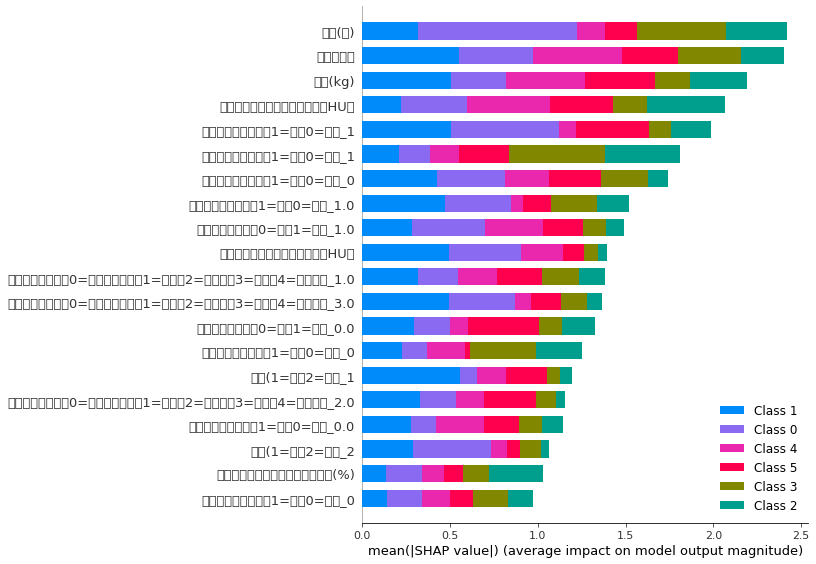

In [57]:
import shap

explainer = shap.DeepExplainer(mnist_net, torch.from_numpy(X_train.values).double())
shap_values = explainer.shap_values(torch.from_numpy(X_test.values).double())
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [58]:
torch.save(mnist_net.state_dict(),"../mnist_net.pt") #保存模型参数
torch.save(optimizer.state_dict(), '../mnist_optimizer.pt') #保存优化器参数

In [59]:
mnist_net.load_state_dict(torch.load("../mnist_net.pt"))
optimizer.load_state_dict(torch.load("../mnist_optimizer.pt"))